87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 25s 0us/step


C:\Users\ayush\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8886 - loss: 0.4579
Epoch 1: val_loss improved from inf to 387985.34375, saving model to best_model.h5


154/154 ━━━━━━━━━━━━━━━━━━━━ 433s 2s/step - accuracy: 0.8888 - loss: 0.4577 - val_accuracy: 0.9509 - val_loss: 387985.3438 - learning_rate: 0.0010
Epoch 2/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9177 - loss: 0.4828
Epoch 2: val_loss improved from 387985.34375 to 0.14712, saving model to best_model.h5


154/154 ━━━━━━━━━━━━━━━━━━━━ 296s 2s/step - accuracy: 0.9177 - loss: 0.4825 - val_accuracy: 0.9509 - val_loss: 0.1471 - learning_rate: 0.0010
Epoch 3/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9096 - loss: 0.2991
Epoch 3: val_loss did not improve from 0.14712
154/154 ━━━━━━━━━━━━━━━━━━━━ 308s 2s/step - accuracy: 0.9096 - loss: 0.2991 - val_accuracy: 0.9509 - val_loss: 2.3943 - learning_rate: 0.0010
Epoch 4/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9100 - loss: 0.2907
Epoch 4: val_loss did not improve from 0.14712
154/154 ━━━━━━━━━━━━━━━━━━━━ 404s 3s/step - accuracy: 0.9099 - loss: 0.2907 - val_accuracy: 0.9509 - val_loss: 0.1662 - learning_rate: 0.0010
Epoch 5/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9090 - loss: 0.2978
Epoch 5: val_loss did not improve from 0.14712
154/154 ━━━━━━━━━━━━━━━━━━━━ 373s 2s/step - accuracy: 0.9090 - loss: 0.2978 - val_accuracy: 0.9509 - val_loss: 13.7142 - learning_rate: 0.0010
Epoch 6/30
154/154 ━━━━━━━━━━━━━━━━

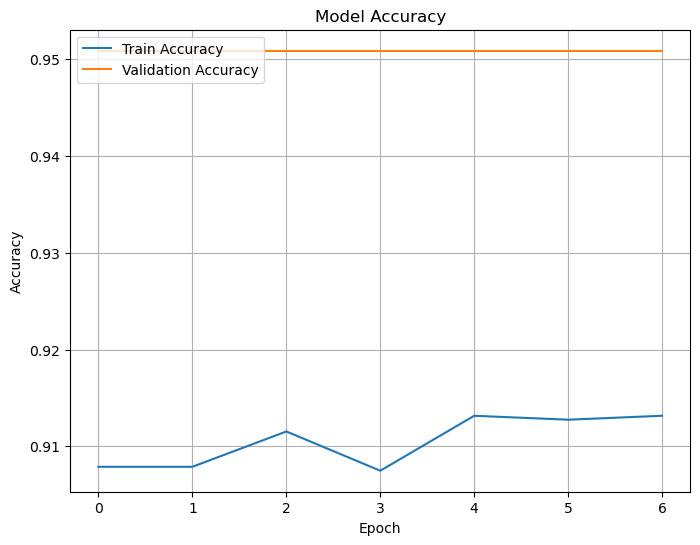

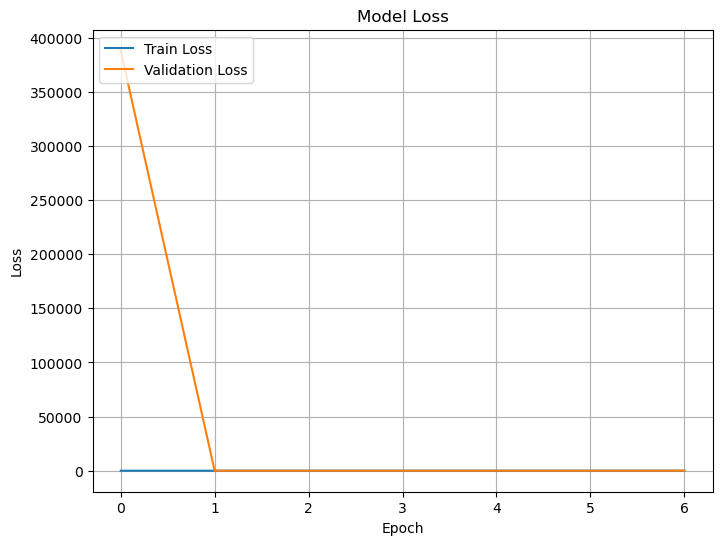

4/4 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step 
              precision    recall  f1-score   support

         0.0     0.0000    0.0000    0.0000        12
         1.0     0.8983    1.0000    0.9464       106

    accuracy                         0.8983       118
   macro avg     0.4492    0.5000    0.4732       118
weighted avg     0.8070    0.8983    0.8502       118



C:\Users\ayush\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ayush\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ayush\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [13]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, ModelCheckpoint, ReduceLROnPlateau
import numpy as np
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import os


train_images_dir = r'C:\Users\ayush\OneDrive\Desktop\WeedCrop Image Dataset\WeedCrop Image Dataset\train\images'
train_labels_dir = r'C:\Users\ayush\OneDrive\Desktop\WeedCrop Image Dataset\WeedCrop Image Dataset\train\labels'
valid_images_dir = r'C:\Users\ayush\OneDrive\Desktop\WeedCrop Image Dataset\WeedCrop Image Dataset\valid\images'
valid_labels_dir = r'C:\Users\ayush\OneDrive\Desktop\WeedCrop Image Dataset\WeedCrop Image Dataset\valid\labels'
test_images_dir = r'C:\Users\ayush\OneDrive\Desktop\WeedCrop Image Dataset\WeedCrop Image Dataset\test\images'
test_labels_dir = r'C:\Users\ayush\OneDrive\Desktop\WeedCrop Image Dataset\WeedCrop Image Dataset\test\labels'


# Data Generator
# Data Generator
class YOLODataGenerator(tf.keras.utils.Sequence):
    def __init__(self, images_dir, labels_dir, batch_size=32, img_size=(139, 139), shuffle=True, augment=False):
        self.images_dir = images_dir
        self.labels_dir = labels_dir
        self.batch_size = batch_size
        self.img_size = img_size
        self.shuffle = shuffle
        self.augment = augment
        self.image_filenames = [f for f in os.listdir(images_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]
        self.on_epoch_end()

        # Define data augmentation pipeline
        if self.augment:
            self.augmenter = ImageDataGenerator(
                rotation_range=20,
                width_shift_range=0.2,
                height_shift_range=0.2,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True,
                brightness_range=[0.8, 1.2],
                fill_mode='nearest'
            )

    def __len__(self):
        return int(np.floor(len(self.image_filenames) / self.batch_size))

    def __getitem__(self, index):
        batch_filenames = self.image_filenames[index * self.batch_size:(index + 1) * self.batch_size]
        images, labels = self.__data_generation(batch_filenames)
        return images, labels

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.image_filenames)

    def __data_generation(self, batch_filenames):
        images = np.empty((self.batch_size, *self.img_size, 3), dtype=np.float32)
        labels = np.empty((self.batch_size, 1), dtype=np.float32)  # Binary classification labels

        for i, filename in enumerate(batch_filenames):
            img_path = os.path.join(self.images_dir, filename)
            image = cv2.imread(img_path)
            image = cv2.resize(image, self.img_size)
            image = image / 255.0  # Normalize to [0, 1]

            # Apply data augmentation if enabled
            if self.augment:
                image = self.augmenter.random_transform(image)

            images[i] = image

            # Load corresponding label
            label_filename = filename.rsplit('.', 1)[0] + '.txt'
            label_path = os.path.join(self.labels_dir, label_filename)
            if os.path.exists(label_path):
                with open(label_path, 'r') as f:
                    label_data = f.readline().strip().split()
                    class_id = float(label_data[0]) if label_data else 0.0  # Use class ID for binary classification
                    labels[i] = class_id
            else:
                labels[i] = 0.0  # Default label if file is missing

        return images, labels

# Now create the data generators
train_generator = YOLODataGenerator(train_images_dir, train_labels_dir, batch_size=16, img_size=(139, 139))
valid_generator = YOLODataGenerator(valid_images_dir, valid_labels_dir, batch_size=16, img_size=(139, 139))


# Model Definition
def build_inception_model(input_shape):
    base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(1, activation='sigmoid')(x)  # Binary classification output
    model = Model(inputs=base_model.input, outputs=outputs)
    return model

# Learning Rate Scheduler
def lr_scheduler(epoch):
    if epoch < 10:
        return 0.001
    elif 10 <= epoch < 20:
        return 0.0001
    else:
        return 0.00001

# Prepare Data
train_generator = YOLODataGenerator(train_images_dir, train_labels_dir, batch_size=16, img_size=(139, 139))
valid_generator = YOLODataGenerator(valid_images_dir, valid_labels_dir, batch_size=16, img_size=(139, 139))

# Build & Compile Model
input_shape = (139, 139, 3)
model = build_inception_model(input_shape)
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])  # Binary cross-entropy loss

# Callbacks
lr_schedule = LearningRateScheduler(lr_scheduler)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, mode='min', verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# Delete Empty Labels
def delete_empty_labels(label_dir):
    for label_file in os.listdir(label_dir):
        if label_file.endswith('.txt'):
            path = os.path.join(label_dir, label_file)
            if os.path.getsize(path) == 0:
                os.remove(path)
                print(f"Deleted empty label file: {label_file}")

delete_empty_labels(train_labels_dir)
delete_empty_labels(valid_labels_dir)

# Train the Model
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=30,
    callbacks=[lr_schedule, early_stop, checkpoint, reduce_lr]
)

# Save Model
model.save('plant_disease_model_inception.keras')

# Plot Metrics
def plot_metrics(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

plot_metrics(history)

# Evaluate on Test Data
def evaluate_model(model, test_images_dir, test_labels_dir, image_size):
    test_images = []
    test_labels = []

    for img_name in os.listdir(test_images_dir):
        if img_name.endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(test_images_dir, img_name)
            img = cv2.imread(img_path)
            img = cv2.resize(img, image_size)
            img = img / 255.0
            test_images.append(img)

            label_path = os.path.join(test_labels_dir, os.path.splitext(img_name)[0] + '.txt')
            if os.path.exists(label_path):
                with open(label_path, 'r') as file:
                    label_data = file.readline().strip().split()
                    class_id = float(label_data[0]) if label_data else 0.0  # Binary label
                    test_labels.append(class_id)
            else:
                test_labels.append(0.0)  # Default label if file is missing

    test_images = np.array(test_images)
    test_labels = np.array(test_labels)

    y_pred = model.predict(test_images)
    y_pred_bool = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions
    print(classification_report(test_labels, y_pred_bool, digits=4))

evaluate_model(model, test_images_dir, test_labels_dir, (139, 139))